# Spatial Joins and Overlays

In [2]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [4]:
np.random.rand(5,2)*10

array([[7.15409136, 3.95168515],
       [1.77121415, 1.25989631],
       [1.26536581, 9.51477855],
       [7.716052  , 1.42392424],
       [3.50191546, 1.70899307]])

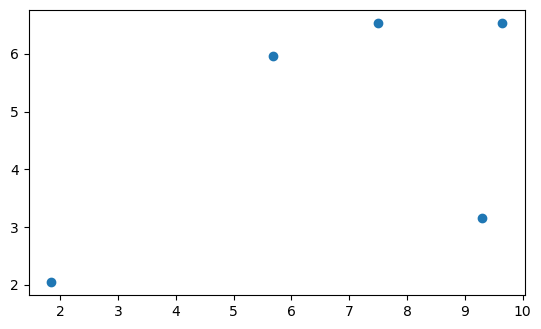

In [5]:
np.random.seed(12345)
points = [Point(pnt) for pnt in np.random.rand(5,2)*10]
points = gpd.GeoDataFrame(geometry=points)
points.plot();

In [6]:
pl0 = Polygon([[0,0], [4,0], [4,4], [3, 1]])

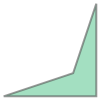

In [7]:
pl0

In [8]:
pl1 = Polygon([(6,1), (7,2), (5,4), (6,1)])
pl2= Polygon([ (9,5), (9, 7), (4,6), (8,4)])

In [9]:
pl_df = gpd.GeoDataFrame(geometry =[ pl0, pl1 , pl2])

<Axes: >

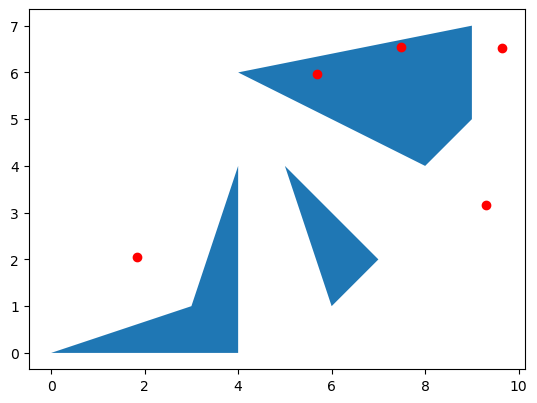

In [10]:
b = pl_df.plot()
points.plot(ax=b, color='r')

In [11]:
gpd.sjoin(points, pl_df)

,geometry,index_right
2,POINT (5.67725 5.95545),2
4,POINT (7.48907 6.53570),2


In [9]:
gpd.sjoin(pl_df, points)

,geometry,index_right
2,"POLYGON ((9.00000 5.00000, 9.00000 7.00000, 4....",2
2,"POLYGON ((9.00000 5.00000, 9.00000 7.00000, 4....",4


In [12]:
gpd.sjoin_nearest(points, pl_df)

,geometry,index_right
0,POINT (9.29616 3.16376),2
2,POINT (5.67725 5.95545),2
3,POINT (9.64515 6.53177),2
4,POINT (7.48907 6.53570),2
1,POINT (1.83919 2.04560),0


In [13]:
gpd.sjoin_nearest(pl_df, points)

,geometry,index_right
0,"POLYGON ((0.00000 0.00000, 4.00000 0.00000, 4....",1
1,"POLYGON ((6.00000 1.00000, 7.00000 2.00000, 5....",2
2,"POLYGON ((9.00000 5.00000, 9.00000 7.00000, 4....",2
2,"POLYGON ((9.00000 5.00000, 9.00000 7.00000, 4....",4


## How

In [14]:
gpd.sjoin(pl_df, points)

,geometry,index_right
2,"POLYGON ((9.00000 5.00000, 9.00000 7.00000, 4....",2
2,"POLYGON ((9.00000 5.00000, 9.00000 7.00000, 4....",4


In [15]:
gpd.sjoin(pl_df, points, how='left') 

,geometry,index_right
0,"POLYGON ((0.00000 0.00000, 4.00000 0.00000, 4....",NaN
1,"POLYGON ((6.00000 1.00000, 7.00000 2.00000, 5....",NaN
2,"POLYGON ((9.00000 5.00000, 9.00000 7.00000, 4....",2.0
2,"POLYGON ((9.00000 5.00000, 9.00000 7.00000, 4....",4.0


In [16]:
gpd.sjoin(pl_df, points, how='right') 

,index_left,geometry
0,NaN,POINT (9.29616 3.16376)
1,NaN,POINT (1.83919 2.04560)
2,2.0,POINT (5.67725 5.95545)
3,NaN,POINT (9.64515 6.53177)
4,2.0,POINT (7.48907 6.53570)


In [15]:
gpd.sjoin(pl_df, points, how='inner')  # default

,geometry,index_right
2,"POLYGON ((9.00000 5.00000, 9.00000 7.00000, 4....",2
2,"POLYGON ((9.00000 5.00000, 9.00000 7.00000, 4....",4


## Nearest


<Axes: >

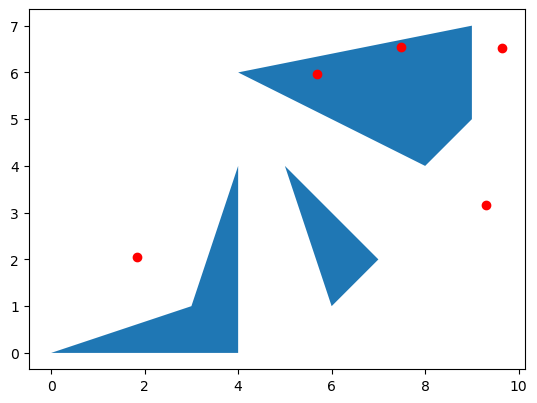

In [17]:
b = pl_df.plot()
points.plot(ax=b, color='r')

In [18]:
gpd.sjoin_nearest(pl_df, points)

,geometry,index_right
0,"POLYGON ((0.00000 0.00000, 4.00000 0.00000, 4....",1
1,"POLYGON ((6.00000 1.00000, 7.00000 2.00000, 5....",2
2,"POLYGON ((9.00000 5.00000, 9.00000 7.00000, 4....",2
2,"POLYGON ((9.00000 5.00000, 9.00000 7.00000, 4....",4


In [21]:
gpd.sjoin_nearest(pl_df, points, distance_col='distance') # distance is 0 if point is in polygon and multiple records if poly contains more than 1 point

,geometry,index_right,distance
0,"POLYGON ((0.00000 0.00000, 4.00000 0.00000, 4....",1,1.359027
1,"POLYGON ((6.00000 1.00000, 7.00000 2.00000, 5....",2,2.069406
2,"POLYGON ((9.00000 5.00000, 9.00000 7.00000, 4....",2,0.000000
2,"POLYGON ((9.00000 5.00000, 9.00000 7.00000, 4....",4,0.000000


In [22]:
gpd.sjoin_nearest(points, pl_df, distance_col='distance')

,geometry,index_right,distance
0,POINT (9.29616 3.16376),2,1.507838
2,POINT (5.67725 5.95545),2,0.000000
3,POINT (9.64515 6.53177),2,0.645145
4,POINT (7.48907 6.53570),2,0.000000
1,POINT (1.83919 2.04560),0,1.359027


## Overlay

In [57]:
polys = [ [(0,0), (5,0), (5,4), (0,4)],
          [(5,0), (11,0), (11,3), (5,3)],
         [(0,5), (5,5), (5,8), (0,8)],
         [ (5,3), (11,3), (11,8), (5, 8)]] 

In [58]:
pl_df = gpd.GeoDataFrame(geometry =[Polygon(poly) for poly in polys])

<Axes: >

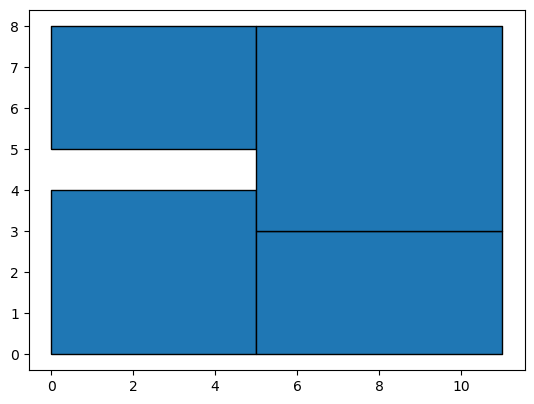

In [59]:
pl_df.plot(edgecolor='k')

In [60]:
buffer = points.buffer(0.5)

<Axes: >

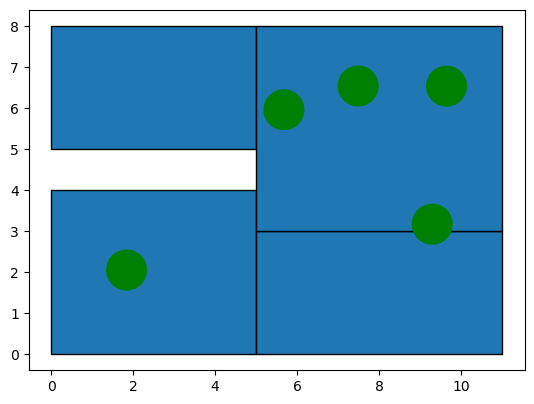

In [61]:
base = pl_df.plot(edgecolor='k')
buffer.plot(ax=base, color='g')

In [62]:
pl_df['pci'] = [45.5, 78.7, 30.5, 102.0]
pl_df['population'] = [4000, 2500, 3000, 1000]

In [63]:
buffer = gpd.GeoDataFrame(geometry=buffer)
buffer['access'] = 'access'

In [64]:
pl_df.overlay(buffer, how='union')

,pci,population,access,geometry
0,45.5,4000,access,"POLYGON ((2.33678 1.99659, 2.32958 1.94806, 2...."
1,78.7,2500,access,"POLYGON ((9.76797 3.00000, 9.75810 2.97241, 9...."
2,102.0,1000,access,"POLYGON ((8.82435 3.00000, 8.81769 3.01861, 8...."
3,102.0,1000,access,"POLYGON ((6.17484 5.90644, 6.16764 5.85790, 6...."
4,102.0,1000,access,"POLYGON ((10.14274 6.48276, 10.13554 6.43423, ..."
5,102.0,1000,access,"POLYGON ((7.98666 6.48669, 7.97946 6.43815, 7...."
6,45.5,4000,NaN,"POLYGON ((0.00000 4.00000, 5.00000 4.00000, 5...."
7,78.7,2500,NaN,"POLYGON ((11.00000 3.00000, 11.00000 0.00000, ..."
8,30.5,3000,NaN,"POLYGON ((0.00000 5.00000, 5.00000 5.00000, 5...."
9,102.0,1000,NaN,"POLYGON ((11.00000 3.00000, 9.76797 3.00000, 9..."


In [65]:
intermediate = pl_df.overlay(buffer, how='union')

In [66]:
intermediate

,pci,population,access,geometry
0,45.5,4000,access,"POLYGON ((2.33678 1.99659, 2.32958 1.94806, 2...."
1,78.7,2500,access,"POLYGON ((9.76797 3.00000, 9.75810 2.97241, 9...."
2,102.0,1000,access,"POLYGON ((8.82435 3.00000, 8.81769 3.01861, 8...."
3,102.0,1000,access,"POLYGON ((6.17484 5.90644, 6.16764 5.85790, 6...."
4,102.0,1000,access,"POLYGON ((10.14274 6.48276, 10.13554 6.43423, ..."
5,102.0,1000,access,"POLYGON ((7.98666 6.48669, 7.97946 6.43815, 7...."
6,45.5,4000,NaN,"POLYGON ((0.00000 4.00000, 5.00000 4.00000, 5...."
7,78.7,2500,NaN,"POLYGON ((11.00000 3.00000, 11.00000 0.00000, ..."
8,30.5,3000,NaN,"POLYGON ((0.00000 5.00000, 5.00000 5.00000, 5...."
9,102.0,1000,NaN,"POLYGON ((11.00000 3.00000, 9.76797 3.00000, 9..."


<Axes: >

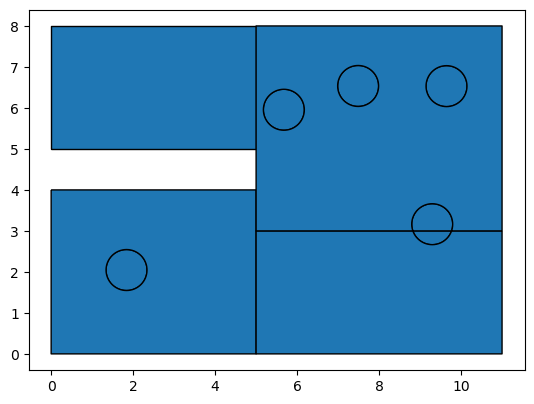

In [67]:
intermediate.plot(edgecolor='k')

In [68]:
intermediate["access"] = intermediate.access.fillna("no access")

<Axes: >

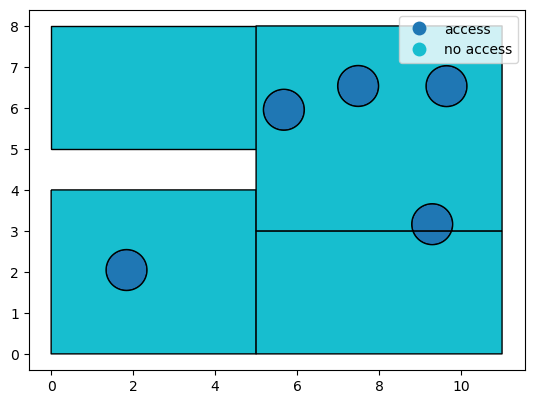

In [69]:
intermediate.plot('access', edgecolor='k', categorical=True, legend=True)

<Axes: >

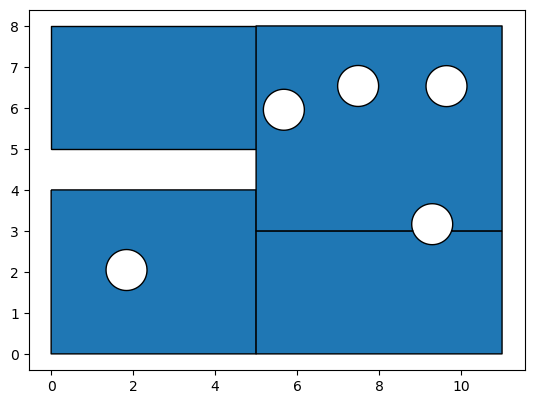

In [70]:
intermediate[intermediate.access=='no access'].plot(edgecolor='k')

## Interpolation

In [71]:
import tobler

In [72]:
tobler.area_weighted.area_interpolate(pl_df, intermediate, 
                                      extensive_variables=['population'],
                                      intensive_variables=['pci'])

,population,pci,geometry
0,156.827435,45.500000,"POLYGON ((2.33678 1.99659, 2.32958 1.94806, 2...."
1,32.141898,78.699995,"POLYGON ((9.76797 3.00000, 9.75810 2.97241, 9...."
2,18.423850,102.000000,"POLYGON ((8.82435 3.00000, 8.81769 3.01861, 8...."
3,26.137905,102.000000,"POLYGON ((6.17484 5.90644, 6.16764 5.85790, 6...."
4,26.137905,102.000000,"POLYGON ((10.14274 6.48276, 10.13554 6.43423, ..."
5,26.137905,102.000000,"POLYGON ((7.98666 6.48669, 7.97946 6.43815, 7...."
6,3843.172550,45.500000,"POLYGON ((0.00000 4.00000, 5.00000 4.00000, 5...."
7,2467.858046,78.700000,"POLYGON ((11.00000 3.00000, 11.00000 0.00000, ..."
8,3000.000000,30.500000,"POLYGON ((0.00000 5.00000, 5.00000 5.00000, 5...."
9,903.162479,102.000000,"POLYGON ((11.00000 3.00000, 9.76797 3.00000, 9..."


In [73]:
final = tobler.area_weighted.area_interpolate(pl_df, intermediate, 
                                      extensive_variables=['population'],
                                      intensive_variables=['pci'])

In [74]:
final.population.sum()

10499.999973922968

In [75]:
intermediate.population.sum()

21000

In [76]:
final['access'] = intermediate.access

In [77]:
final

,population,pci,geometry,access
0,156.827435,45.500000,"POLYGON ((2.33678 1.99659, 2.32958 1.94806, 2....",access
1,32.141898,78.699995,"POLYGON ((9.76797 3.00000, 9.75810 2.97241, 9....",access
2,18.423850,102.000000,"POLYGON ((8.82435 3.00000, 8.81769 3.01861, 8....",access
3,26.137905,102.000000,"POLYGON ((6.17484 5.90644, 6.16764 5.85790, 6....",access
4,26.137905,102.000000,"POLYGON ((10.14274 6.48276, 10.13554 6.43423, ...",access
5,26.137905,102.000000,"POLYGON ((7.98666 6.48669, 7.97946 6.43815, 7....",access
6,3843.172550,45.500000,"POLYGON ((0.00000 4.00000, 5.00000 4.00000, 5....",no access
7,2467.858046,78.700000,"POLYGON ((11.00000 3.00000, 11.00000 0.00000, ...",no access
8,3000.000000,30.500000,"POLYGON ((0.00000 5.00000, 5.00000 5.00000, 5....",no access
9,903.162479,102.000000,"POLYGON ((11.00000 3.00000, 9.76797 3.00000, 9...",no access


How many people live within the access buffers?

In [78]:
final[['population', 'access']].groupby(by='access').sum()

,population
access,
access,285.806898
no access,10214.193076


What are the income levels in the two areas?

In [79]:
final[['pci', 'access']].groupby(by='access').mean()

,pci
access,
access,88.699999
no access,64.175000
